In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import seaborn as sns

%matplotlib notebook

The following query was run to select sources between declination -10 and -9.66666666666, in order to match these sources to those that were classified by the PS1 RF model:

    select ps1.*,
     sqrt(power(pmra,2) + power(pmdec,2)) as pm, 
    sqrt( power(pmra,2)*power(pmra_error, 2)/sqrt(power(pmra,2) + power(pmdec,2)) + power(pmdec,2)*power(pmdec_error, 2)/sqrt(power(pmra,2) + power(pmdec,2)) + 2*pmra*pmdec/sqrt(power(pmra,2) + power(pmdec,2))*pmra_pmdec_corr*pmra_error*pmdec_error) as pm_unc, gaia.parallax_over_error, gaia.phot_g_mean_mag, gaia.b
    from gaiadr2.panstarrs1_best_neighbour as ps1 
    inner join gaiadr2.gaia_source as gaia
    on ps1.source_id = gaia.source_id
    where gaia.astrometric_params_solved > 3
    and gaia.dec between -10 and -9.66666666666666666
    order by ps1.original_ext_source_id

The results are stored in the file `neg10_match-result.fits`

In [12]:
gaia = fits.getdata("neg10_match-result.fits")

In [13]:
ps1 = pd.read_hdf("/Users/adamamiller/Desktop/PS1_fits/hdf5/dec_neg10_0_classifications.h5")

In [23]:
gaia_objid = np.array(gaia['original_ext_source_id'], dtype="int64") #.byteswap().newbyteorder()
gaia_parallax = np.array(gaia['parallax_over_error'], dtype="float") #.byteswap().newbyteorder()
gaia_pm = np.array(gaia['pm']/gaia['pm_unc'], dtype="float") #.byteswap().newbyteorder()
gaia_g = np.array(gaia["phot_g_mean_mag"], dtype="float")
gaia_b = np.array(gaia["b"], dtype="float")

In [24]:
gaia_df = pd.DataFrame(gaia_objid, columns=["objid"])
gaia_df["parallax_signif"] = gaia_parallax
gaia_df["pm_signif"] = gaia_pm
gaia_df["G"] = gaia_g
gaia_df["b"] = gaia_b

In [25]:
ps1_objid = np.array(ps1["objid"], dtype="int64") #.byteswap().newbyteorder()
ps1_sg_score = np.array(ps1["rf_score"], dtype="float") #.byteswap().newbyteorder()

In [26]:
ps1_df = pd.DataFrame(ps1_objid, columns=["objid"])
ps1_df["sg_score"] = ps1_sg_score

Merge the two DFs in order to directly compare the sg_score to the parallax measurements

In [27]:
merge = pd.merge(ps1_df, gaia_df, on="objid")

In [28]:
merge

,objid,sg_score,parallax_signif,pm_signif,G,b
0,96250867397387866,1.000000,4.365295,8.193198,18.698818,-18.723691
1,96052794495856044,0.791958,1.181394,2.579967,19.478045,-1.528734
2,96242699889473263,0.809000,2.563145,1.303552,20.282349,6.762730
3,96342457459259261,0.991875,1.028917,5.534632,19.488340,26.899194
4,96393045587672057,0.982083,6.174770,75.533342,13.621438,-23.640866
5,96043315468537390,0.947375,-0.840000,2.348704,19.392916,-47.500670
6,96252616252476006,0.103226,3.580967,4.845201,19.106785,13.894532
7,96232367748678753,0.994375,0.430716,1.619850,20.458599,33.651158
8,96362750510598652,0.931406,2.343768,9.888904,17.166018,2.430877
9,96261100402425020,0.947048,-1.092595,1.417240,20.471758,1.844109


## Make some plots

Show the parallax SNR as a function of sg_score, G mag, and galactic latitude in the existing PS1 catalog.

<IPython.core.display.Javascript object>


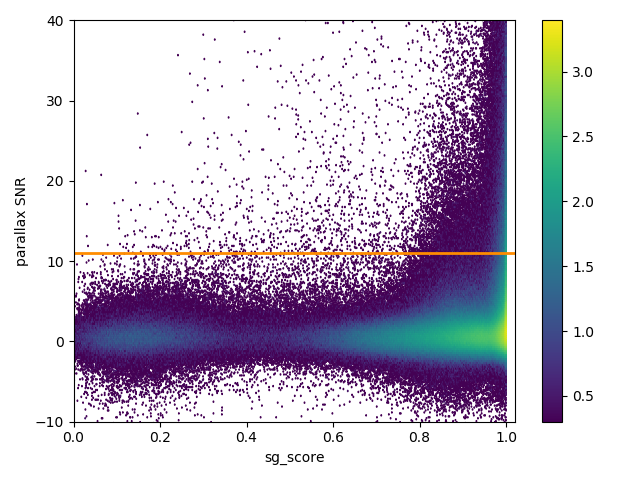

In [20]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["sg_score"], merge["parallax_signif"],
                bins="log", mincnt=1, gridsize=1000,
                extent=(0,1,-20,120))
ax.plot([-1,2], [11,11], 'DarkOrange', lw=2)
ax.set_xlim(0,1.02)
ax.set_ylim(-10,40)
ax.set_xlabel("sg_score")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

In [22]:
# hax = sns.jointplot(merge["sg_score"], merge["parallax_signif"], 
#               kind="hex", stat_func=None, 
#               bins="log", mincnt=1, gridsize=1000,
#               xlim=(0,1), ylim=(-20,120), 
#               cmap="viridis",
#               marginal_kws={'bins':1000})
# hax.ax_joint.set_ylim(-10,40)

<IPython.core.display.Javascript object>


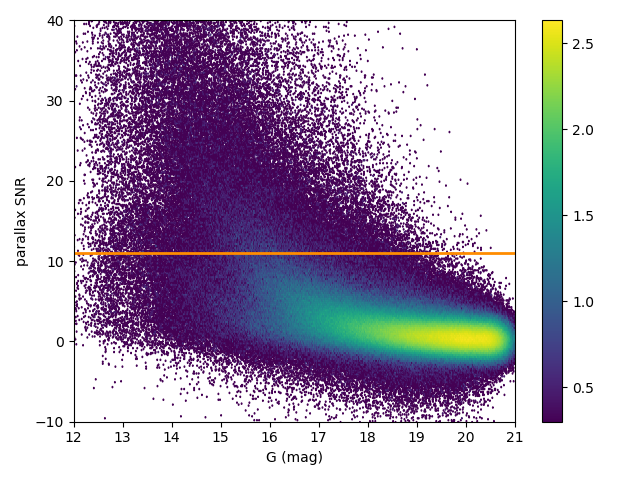

In [75]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["G"], merge["parallax_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(10,21,-20,120))
ax.plot([-1,22], [11,11], 'DarkOrange', lw=2)

ax.set_xlim(12,21)
ax.set_ylim(-10,40)
ax.set_xlabel("G (mag)")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


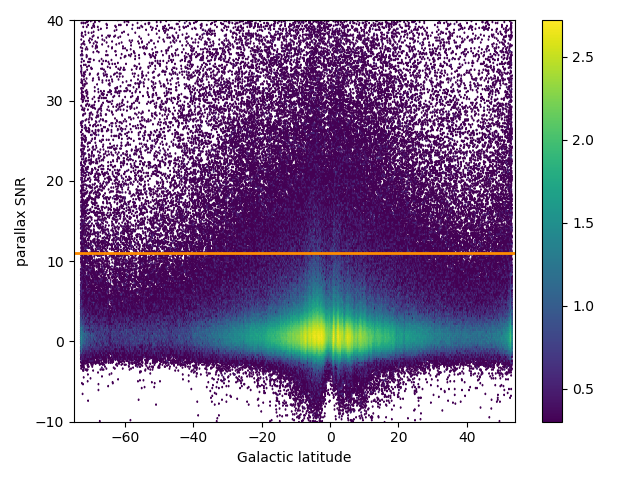

In [31]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["b"], merge["parallax_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(-75,54,-20,120))
ax.plot([-75,54], [11,11], 'DarkOrange', lw=2)

ax.set_xlim(-75,54)
ax.set_ylim(-10,40)
ax.set_xlabel("Galactic latitude")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

Create the same 3 plots, but this time showing the proper motion SNR as a function of sg_score, G mag, and galactic latitude in the existing PS1 catalog.

<IPython.core.display.Javascript object>


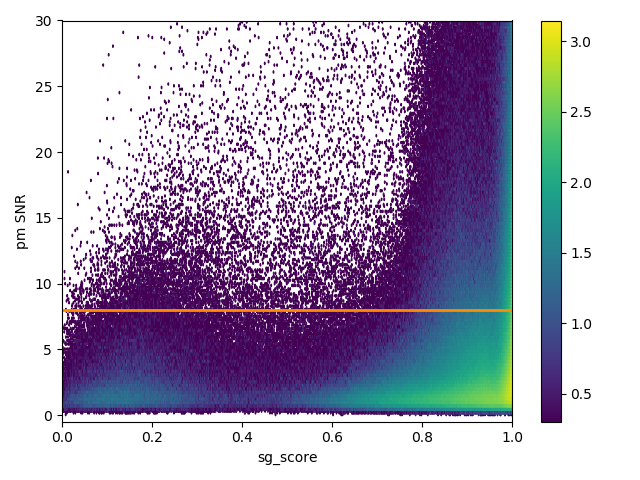

In [32]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["sg_score"], merge["pm_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(0,1,-1,150))
ax.plot([-1,2], [8,8], 'DarkOrange', lw=2)

ax.set_xlim(0,1)
ax.set_ylim(-0.5,30)
ax.set_xlabel("sg_score")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


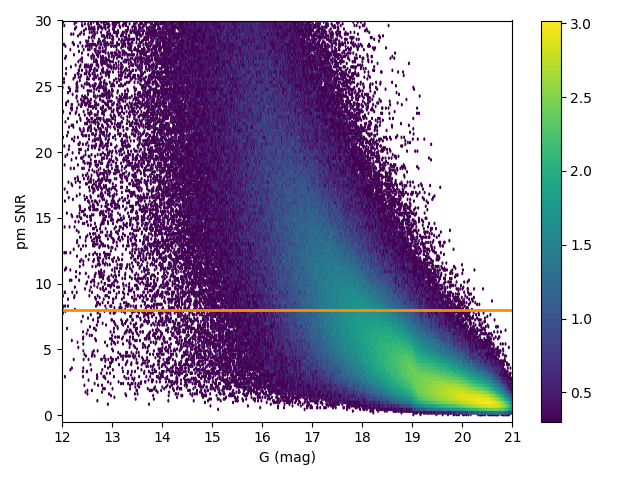

In [33]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["G"], merge["pm_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(10,21,-1,150))
ax.plot([-1,22], [8,8], 'DarkOrange', lw=2)

ax.set_xlim(12,21)
ax.set_ylim(-0.5,30)
ax.set_xlabel("G (mag)")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


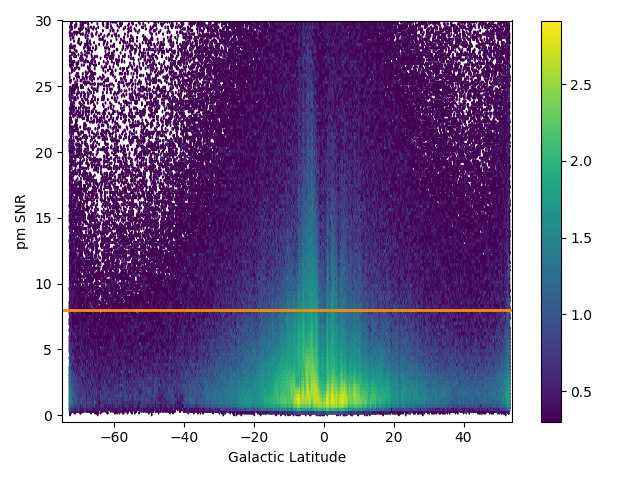

In [35]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["b"], merge["pm_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(-75,54,-1,150))
ax.plot([-75,54], [8,8], 'DarkOrange', lw=2)

ax.set_xlim(-75,54)
ax.set_ylim(-0.5,30)
ax.set_xlabel("Galactic Latitude")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

The above plot shows a strong excess of sources at low galactic latitude with high significance proper motion measurements. The challenge here is to identify whether that excess is due to higher number counts, or poor measurements of proper motion due to crowding.

Finally, plot the distribution of PS1 sg_score values for sources that would be selected as stars via this method.

<IPython.core.display.Javascript object>


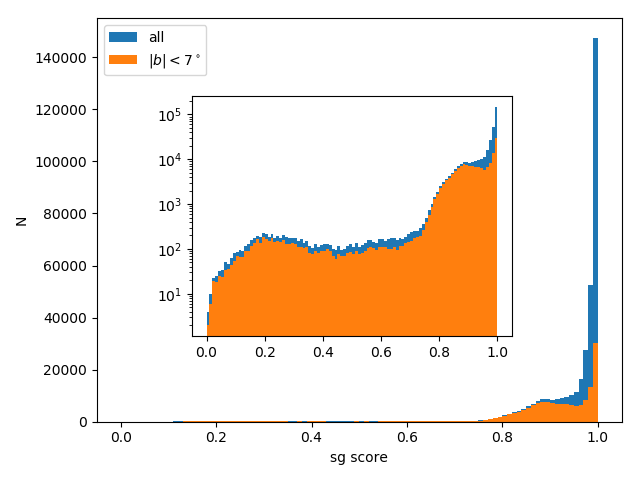

/Users/adamamiller/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [46]:
def_stars = np.where((merge["parallax_signif"] > 11) | (merge["pm_signif"] > 8))
def_stars_low_lat = np.where(((merge["parallax_signif"] > 11) | (merge["pm_signif"] > 8)) & 
                             (np.abs(merge["b"]) < 7))


fig, ax = plt.subplots()
ax.hist(merge["sg_score"].iloc[def_stars], 
        range=(0,1), bins=100,
        label="all")
ax.hist(merge["sg_score"].iloc[def_stars_low_lat], 
        range=(0,1), bins=100,
        label="$|b| < 7^\circ$")

axins = plt.axes([0.3,0.3,0.5,0.5])
axins.hist(merge["sg_score"].iloc[def_stars], 
        range=(0,1), bins=100,
        label="all")
axins.hist(merge["sg_score"].iloc[def_stars_low_lat], 
        range=(0,1), bins=100,
        label="$|b| < 7^\circ$")


ax.set_xlabel("sg score")
ax.set_ylabel("N")
axins.set_yscale("log")
ax.legend()

fig.tight_layout()

In [20]:
gaia_only_df = pd.merge(gaia_df, ps1_df, on="objid", how="left")    # perform a left join
gaia_only_df.drop(gaia_only_df[gaia_only_df.sg_score >= 0].index, inplace=True)   # drop rows with PS1 matches

<IPython.core.display.Javascript object>


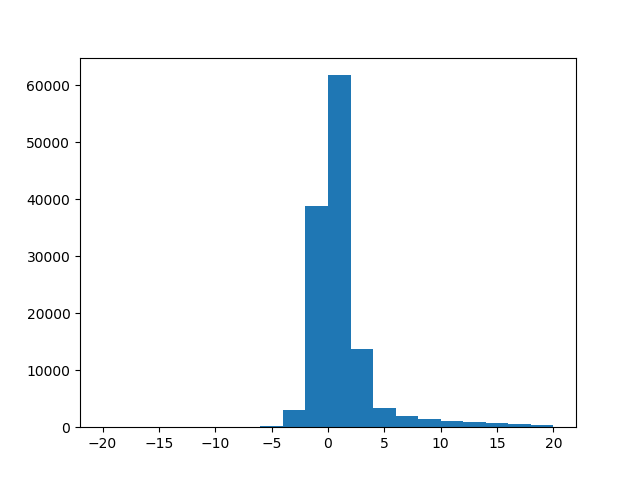

(array([  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   9.00000000e+00,   1.60000000e+01,
          8.20000000e+01,   2.85000000e+02,   2.96800000e+03,
          3.88800000e+04,   6.17610000e+04,   1.37900000e+04,
          3.45100000e+03,   1.93900000e+03,   1.51400000e+03,
          1.12800000e+03,   9.26000000e+02,   7.44000000e+02,
          5.59000000e+02,   4.20000000e+02]),
 array([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,
          2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 20 Patch objects>)

In [21]:
fig, ax = plt.subplots()
ax.hist(gaia_only_df["parallax_signif"][np.isfinite(gaia_only_df["parallax_signif"])],
        range=(-20,20),bins=20)

<IPython.core.display.Javascript object>


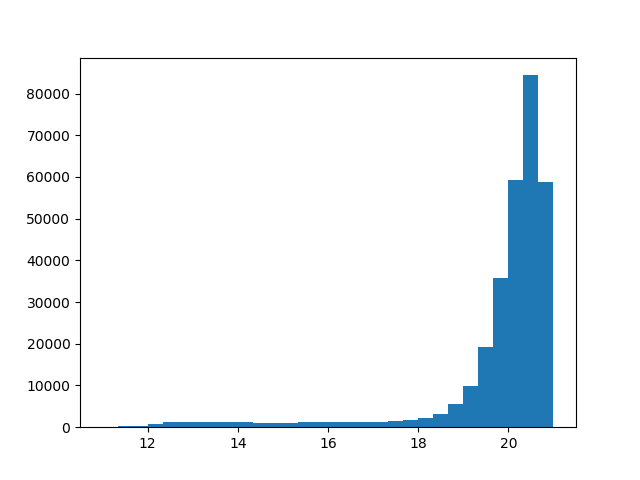

(array([   145.,    184.,    302.,    805.,   1329.,   1339.,   1291.,
          1181.,   1235.,   1169.,   1075.,   1110.,   1120.,   1174.,
          1160.,   1241.,   1164.,   1232.,   1260.,   1425.,   1766.,
          2191.,   3225.,   5450.,   9786.,  19304.,  35875.,  59288.,
         84409.,  58903.]),
 array([ 11.        ,  11.33333333,  11.66666667,  12.        ,
         12.33333333,  12.66666667,  13.        ,  13.33333333,
         13.66666667,  14.        ,  14.33333333,  14.66666667,
         15.        ,  15.33333333,  15.66666667,  16.        ,
         16.33333333,  16.66666667,  17.        ,  17.33333333,
         17.66666667,  18.        ,  18.33333333,  18.66666667,
         19.        ,  19.33333333,  19.66666667,  20.        ,
         20.33333333,  20.66666667,  21.        ]),
 <a list of 30 Patch objects>)

In [22]:
fig, ax = plt.subplots()
ax.hist(gaia_only_df["G"][np.isfinite(gaia_only_df["G"])],
        range=(11,21),bins=30)

### Print out some summary statistics

In [23]:
print("There are {}, {}, {} sources with parallax > 3, 4, 5 sigma".format(sum(merge["parallax_signif"] > 3), 
                                                                    sum(merge["parallax_signif"] > 4), 
                                                                    sum(merge["parallax_signif"] > 5)))
print("There are {}, {}, {} sources with PM > 3, 4, 5 sigma".format(sum(merge["pm_signif"] > 3), 
                                                                    sum(merge["pm_signif"] > 4), 
                                                                    sum(merge["pm_signif"] > 5)))

There are 349578, 240884, 182618 sources with parallax > 3, 4, 5 sigma
There are 1000811, 784355, 631320 sources with PM > 3, 4, 5 sigma


In [78]:
parallax_cut = 11
pm_cut = 8
print("There are {} PS1 sources not in PS1-ZTF catalog".format(len(gaia_only_df)))
print("\t{} of these sources have G < 19".format(len(np.where(gaia_only_df["G"] < 19)[0])))
print("\t\t{} of these sources have parallax_signif > {}".format(len(np.where((gaia_only_df["G"] < 19) &
                                                                             (gaia_only_df["parallax_signif"] > parallax_cut))[0]),
                                                                 parallax_cut))
print("\t\t{} of these sources have PM > {}".format(len(np.where((gaia_only_df["G"] < 19) & 
                                                                 (gaia_only_df["pm_signif"] > pm_cut))[0]),
                                                    pm_cut))
print("\t{} of these sources have parallax_signif > {}".format(len(np.where(gaia_only_df["parallax_signif"] > parallax_cut)[0]), 
                                                               parallax_cut))
print("\t{} of these sources have PM > {}".format(len(np.where(gaia_only_df["pm_signif"] > pm_cut)[0]), pm_cut))

There are 306619 PS1 sources not in PS1-ZTF catalog
	33744 of these sources have G < 19
		7208 of these sources have parallax_signif > 11
		19330 of these sources have PM > 8
	7218 of these sources have parallax_signif > 11
	19404 of these sources have PM > 8


In [79]:
faint = np.where((merge["G"] >= 20.5))
print("There are {} faint sources ({:.2f}% of all)".format(len(faint[0]), 100*len(faint[0])/len(merge)))

There are 522355 faint sources (19.03% of all)


In [80]:
faint_pm = merge["pm_signif"].iloc[faint[0]]
np.percentile(faint_pm[np.isfinite(faint_pm)], (50, 99.997))

array([ 0.96596083,  6.75485215])

In [81]:
faint_parallax = merge["parallax_signif"].iloc[faint[0]]
np.percentile(faint_parallax[np.isfinite(faint_parallax)], (50, 99.997))

array([ 0.2509606 ,  7.55919897])